Qiskit Hello World!

In [76]:
import numpy as np
from qiskit import QuantumCircuit
import matplotlib.pyplot as plt
from scipy import linalg
from math import pi

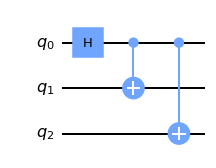

In [2]:
circ = QuantumCircuit(3)
circ.h(0)
circ.cx(0, 1)
circ.cx(0, 2)
circ.draw("mpl")

In [3]:
from qiskit.quantum_info import Statevector

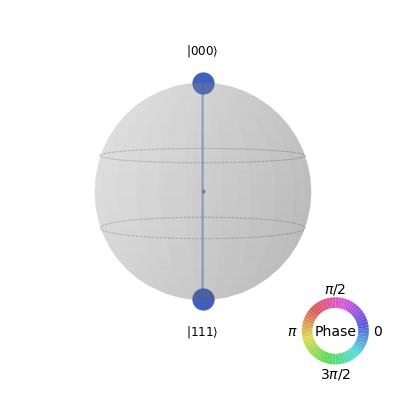

In [4]:
state = Statevector.from_int(0, 2**3)
state = state.evolve(circ)
state.draw("latex")
state.draw("qsphere")

In [5]:
from qiskit.quantum_info import Operator
U = Operator(circ)
U.data

array([[ 0.70710678+0.j,  0.70710678+0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.70710678+0.j, -0.70710678+0.j],
       [ 0.        +0.j,  0.        +0.j,  0.70710678+0.j,
         0.70710678+0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.70710678+0.j, -0.70710678+0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.70710678+0.j,  0.70710678+0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.70710678+0.j,
        -0.70710678+0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.      

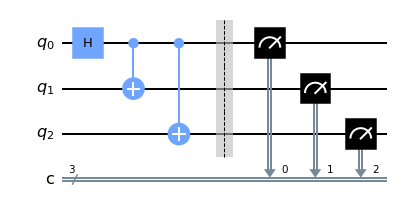

In [6]:
meas = QuantumCircuit(3, 3)
meas.barrier(range(3))
meas.measure(range(3), range(3))
qc = meas.compose(circ, range(3), front=True)
qc.draw("mpl")

{'111': 49, '000': 51}


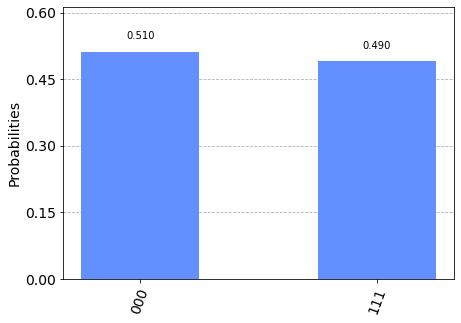

In [7]:
from qiskit import transpile
from qiskit.providers.aer import AerSimulator, Aer
backend = AerSimulator()
qc_compiled = transpile(qc, backend)
job_sim = backend.run(qc_compiled, shots=100)
result_sim = job_sim.result()
counts = result_sim.get_counts()
print(counts)
from qiskit.visualization import plot_histogram
plot_histogram(counts)